In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from train import train_fidelity, train_base, train_gradreg
from models.mnist_cnn import CNN3b, CNN4b
from loaders.mnist_loader import MNIST_data
from torch.optim import Adam, Adadelta
from losses.losses import FidelityConstraint, StandardCrossEntropy, GradientRegularization
from metrics.metrics import accuracy, MoRF
from torch.nn import Softmax 
from captum.attr import Saliency

In [2]:
loaders = MNIST_data(batch_size = 60)

In [3]:
print("CUDA Available: ",torch.cuda.is_available())
use_cuda=True
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

CUDA Available:  True


In [4]:
 torch.cuda.empty_cache()

In [5]:
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

NVIDIA GeForce RTX 2060 with Max-Q Design
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [6]:
cmodel = CNN3b().to(device)
optimizer = Adam(cmodel.parameters())   

In [7]:
acc, loss = train_gradreg(cmodel, loaders, 4, optimizer, constraint="consistency", alpha=0.1)

C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\losses\losses.py:84: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  cgrad = ngrad[(torch.argmax(self.softmax(outputs), dim=1) == n),:,:,:]
C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\losses\losses.py:90: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  log_probabilities = self.log_softmax(outputs)


Epoch [1/4], Step [100/1000], Loss: 0.2783
Epoch [1/4], Step [200/1000], Loss: 0.1700
Epoch [1/4], Step [300/1000], Loss: 0.0785
Epoch [1/4], Step [400/1000], Loss: 0.1185
Epoch [1/4], Step [500/1000], Loss: 0.1316
Epoch [1/4], Step [600/1000], Loss: 0.0381
Epoch [1/4], Step [700/1000], Loss: 0.0376
Epoch [1/4], Step [800/1000], Loss: 0.0377
Epoch [1/4], Step [900/1000], Loss: 0.0617
Epoch [1/4], Step [1000/1000], Loss: 0.1032
Accuracy =  0.94
Epoch [2/4], Step [100/1000], Loss: 0.0747
Epoch [2/4], Step [200/1000], Loss: 0.0195
Epoch [2/4], Step [300/1000], Loss: 0.0334
Epoch [2/4], Step [400/1000], Loss: 0.0185
Epoch [2/4], Step [500/1000], Loss: 0.0739
Epoch [2/4], Step [600/1000], Loss: 0.0431
Epoch [2/4], Step [700/1000], Loss: 0.0454
Epoch [2/4], Step [800/1000], Loss: 0.0537
Epoch [2/4], Step [900/1000], Loss: 0.0822
Epoch [2/4], Step [1000/1000], Loss: 0.0329
Accuracy =  0.98255
Epoch [3/4], Step [100/1000], Loss: 0.0235
Epoch [3/4], Step [200/1000], Loss: 0.0169
Epoch [3/4], St

In [8]:
grad = Saliency(cmodel)

C:\Users\unknown\Anaconda3\envs\xai4uc3\lib\site-packages\captum\_utils\gradient.py:58: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index


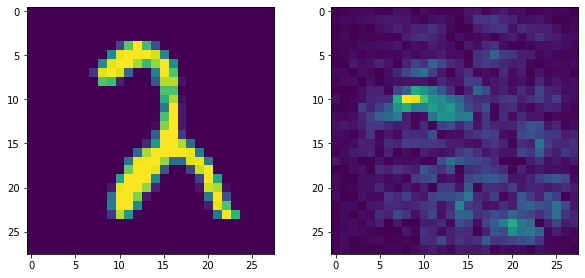

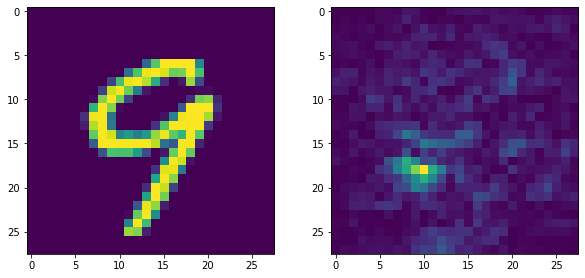

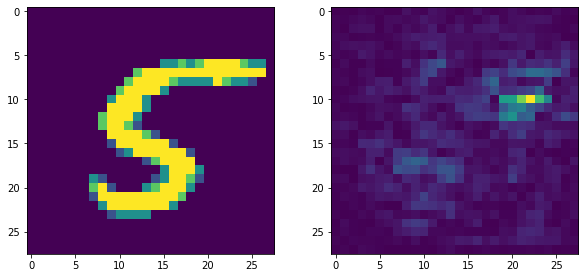

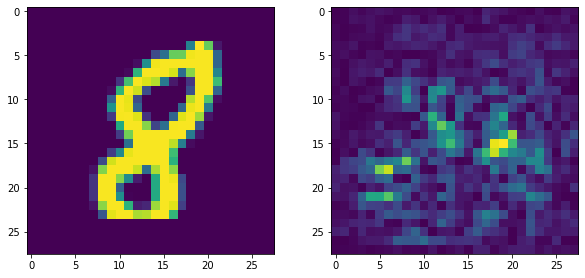

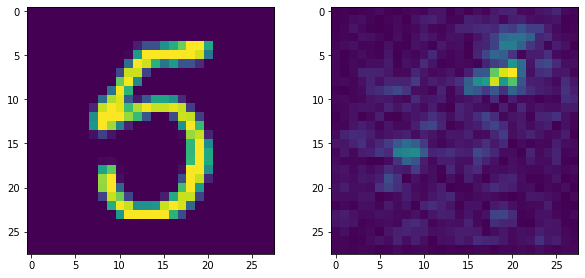

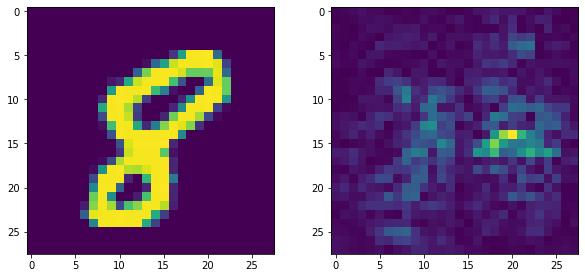

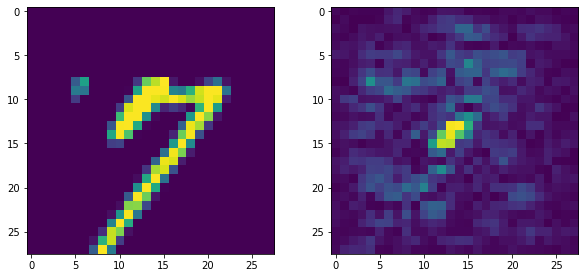

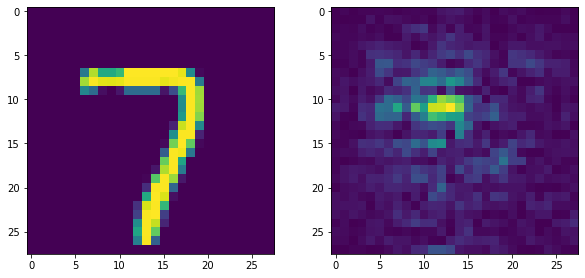

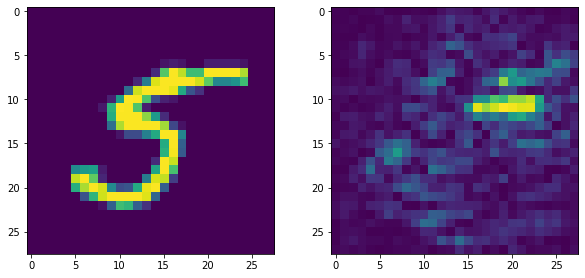

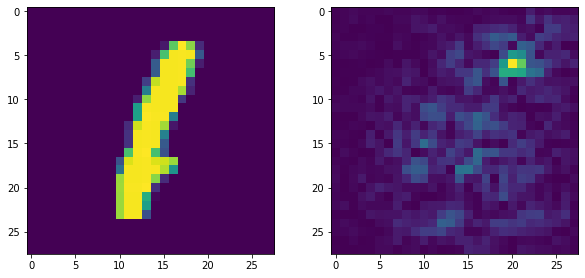

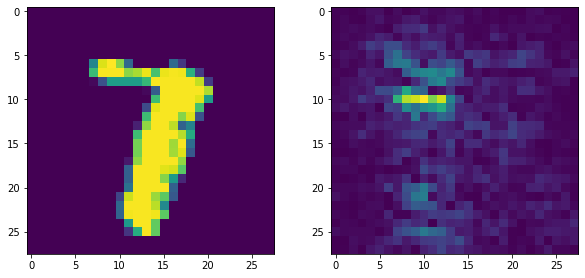

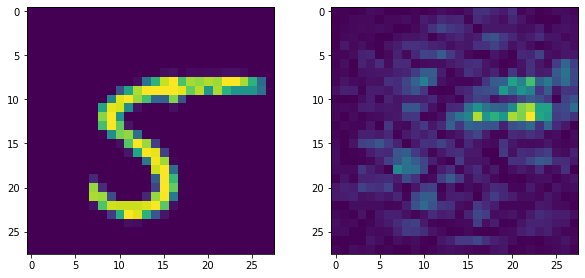

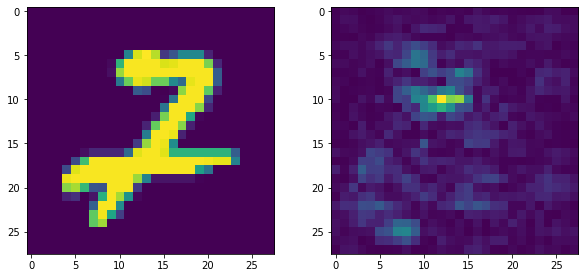

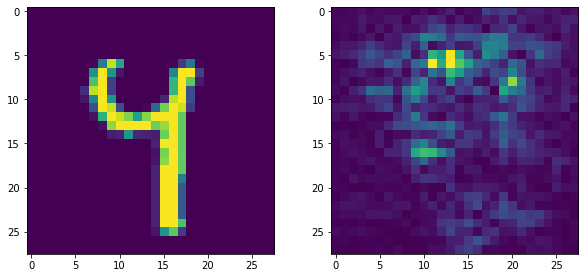

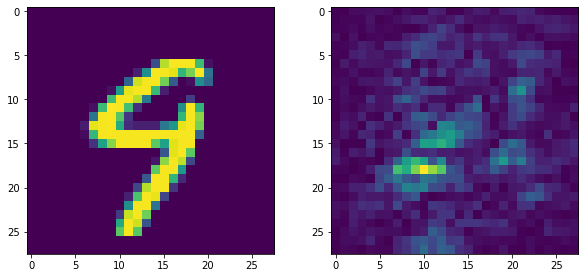

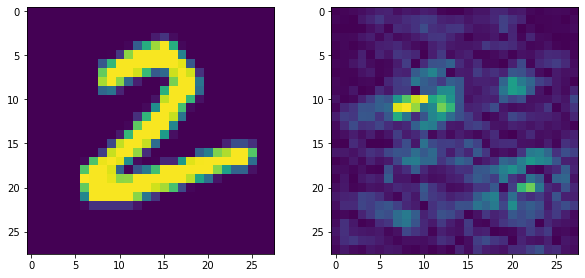

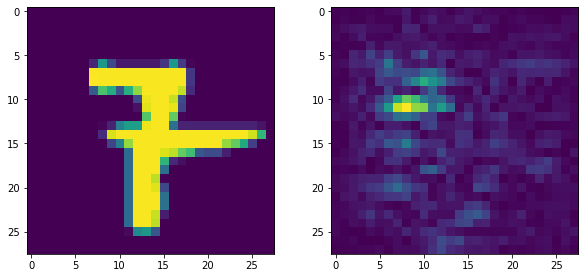

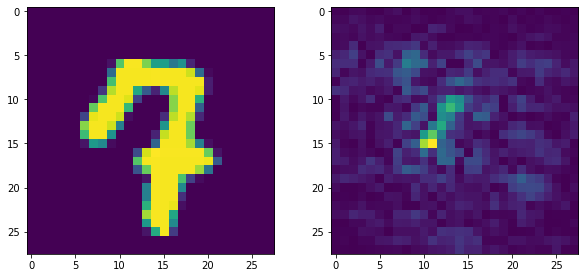

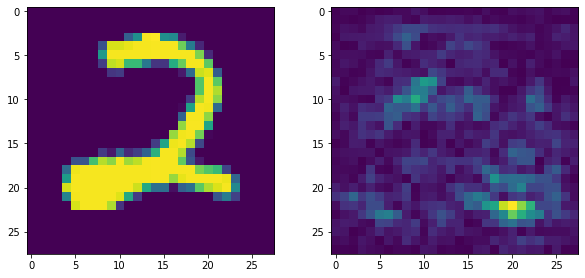

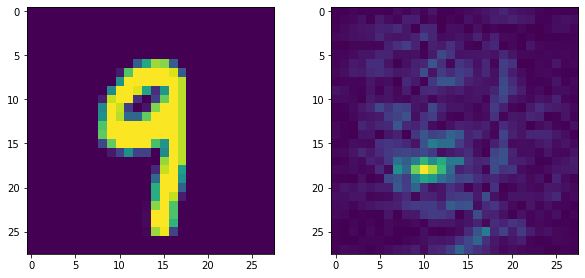

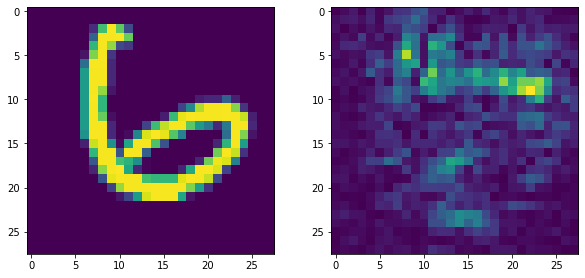

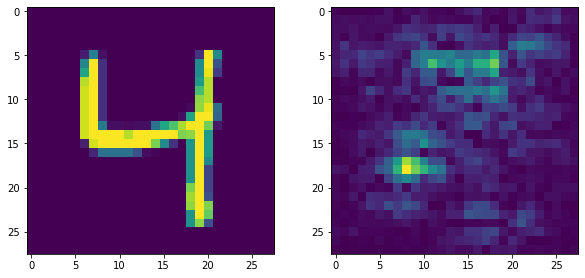

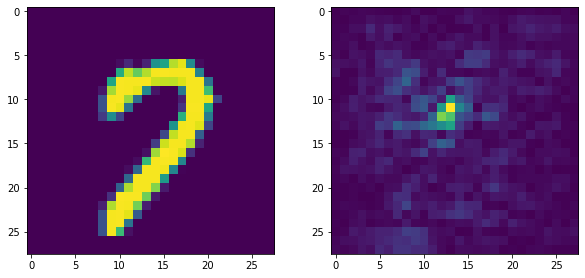

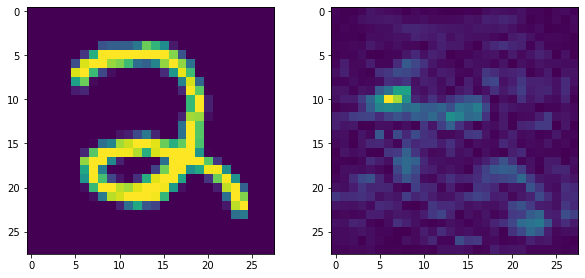

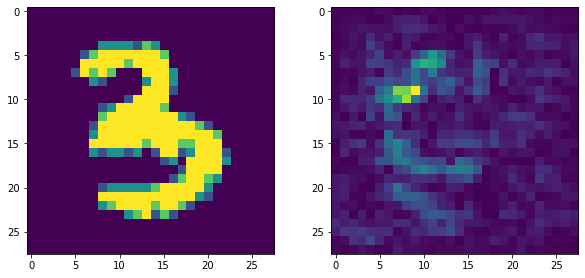

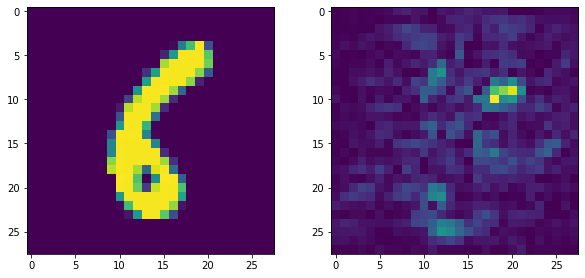

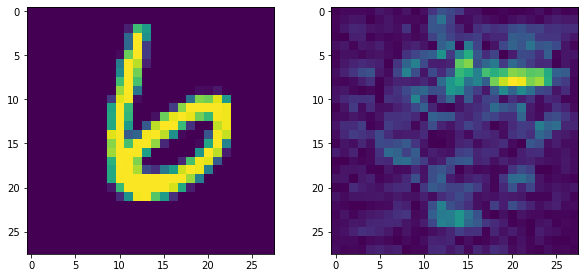

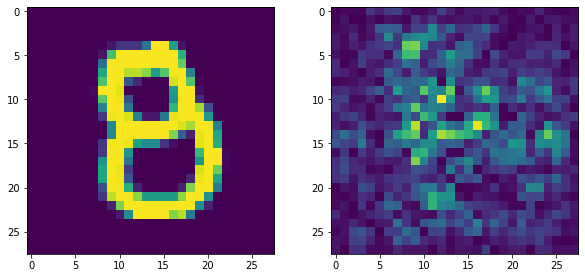

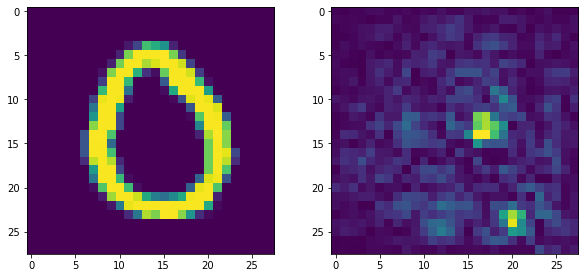

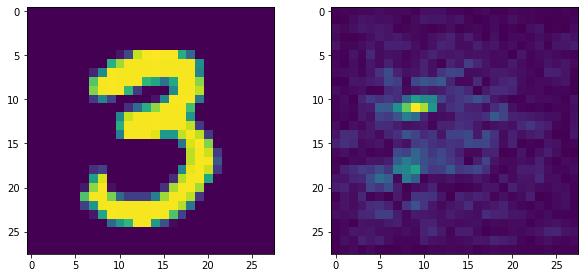

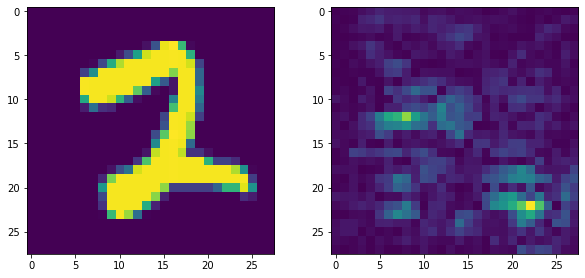

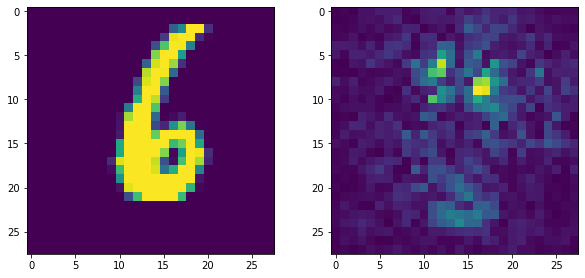

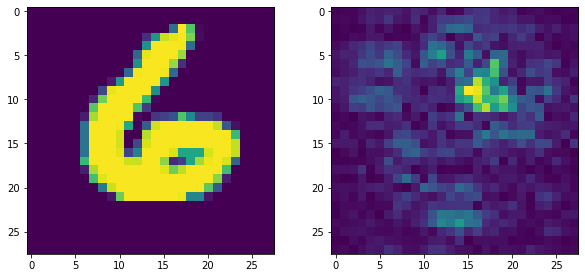

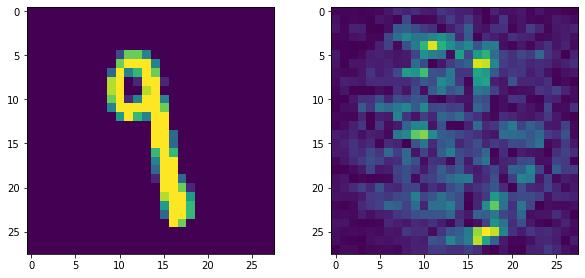

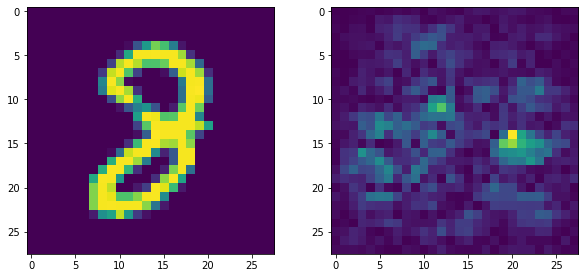

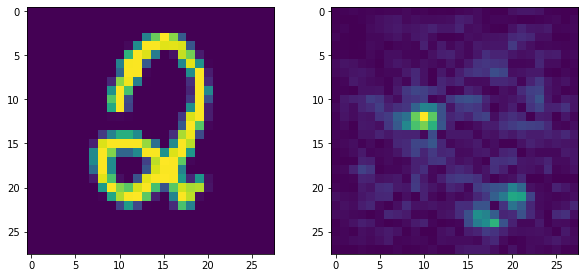

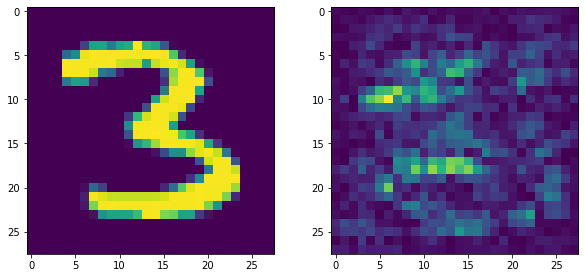

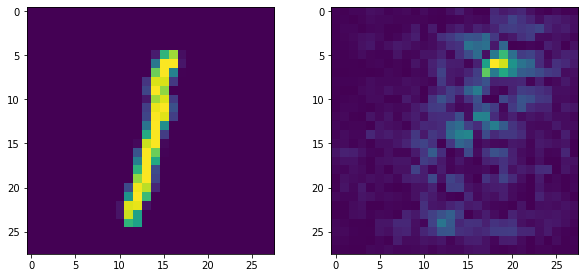

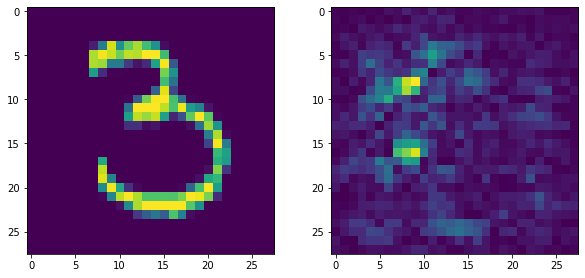

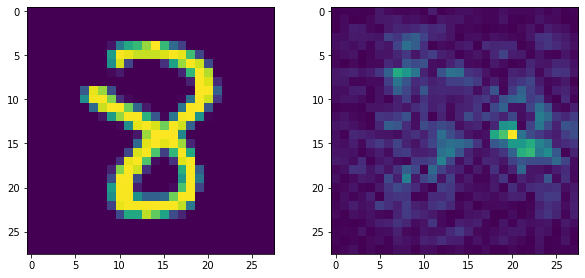

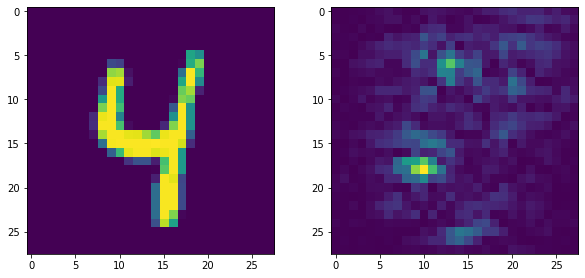

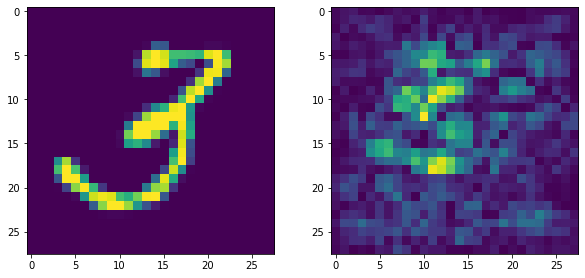

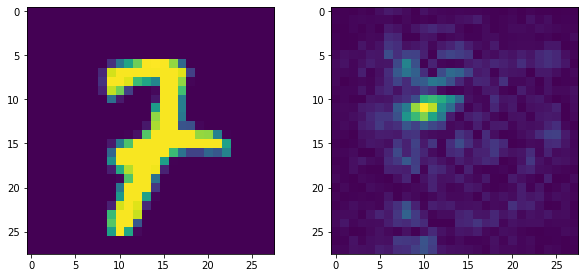

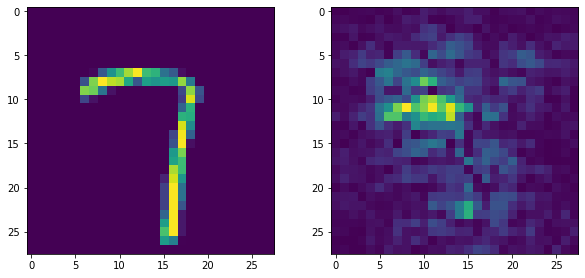

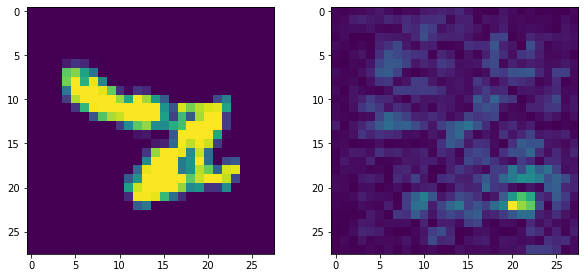

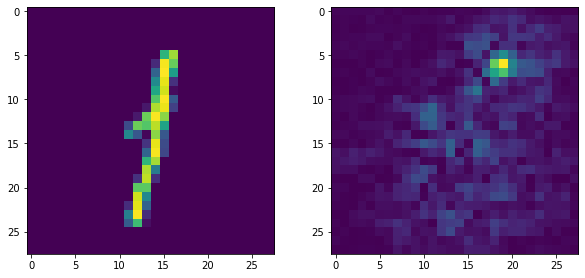

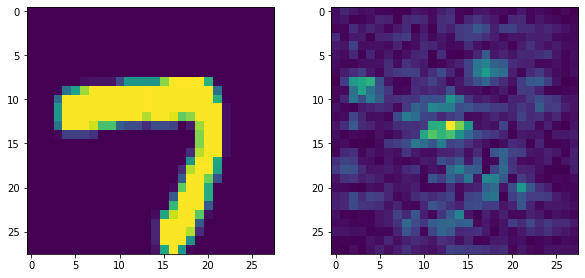

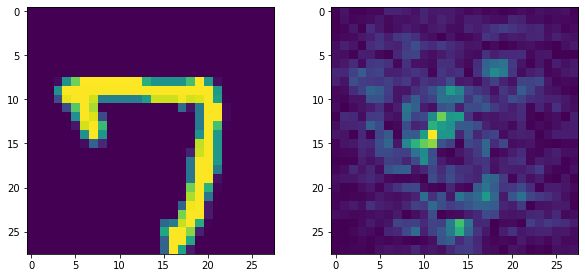

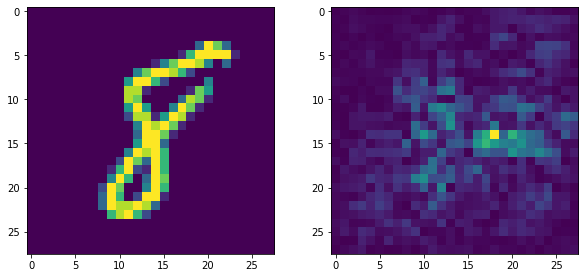

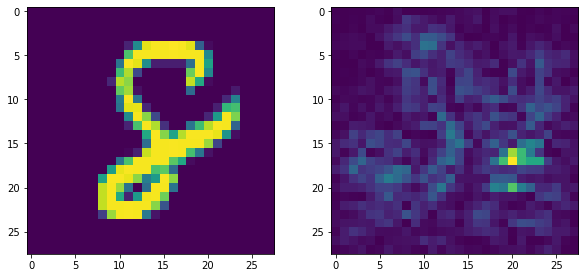

In [9]:
sample = iter(loaders['test'])
imgs = []
lbls = []


for i in range(50):
    img, lbl = next(sample)
    img = img.to(device)
    lbl = lbl.to(device)
    
    attr = grad.attribute(img, target=lbl.item())
    attr = attr.squeeze()    
   
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(2,2,1)
    ax1.imshow(img.squeeze().cpu().numpy())
    ax2 = fig.add_subplot(2,2,2)
    ax2.imshow(attr.squeeze().cpu().numpy())
    plt.show()
    

In [11]:
accuracy(cmodel,loaders)

0.9904

In [13]:
torch.save(cmodel, r"C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\results\3b_cnn_adam_cons_9904.pt")

In [8]:
accuracy(fmodel,loaders)

0.9894

In [19]:
accuracy(bmodel,loaders)

0.9906

In [13]:
accuracy(gmodel,loaders)

0.9877

In [19]:
accuracy(bmodel1,loaders)

0.9881

In [20]:
#torch.save(bmodel1, r"C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\results\4b_cnn_adadelta_9881.pt")

In [29]:
model0 = torch.load(r"C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\results\3b_cnn_adam_fid_9684.pt")
model0.eval()

CNN3b(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

In [4]:
model1 = torch.load(r"C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\results\\4b_cnn_adadelta_fid_9518.pt")
model1.eval()

CNN4b(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Flatten(start_dim=1, end_dim=-1)
  )
  (dense1): Sequential(
    (0): Linear(in_features=16384, out_features=128, bias=True)
  )
  (dense2): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [9]:
x = []
y = []

for images, labels in loaders['train']:
    x.append(images)
    y.append(labels)

In [10]:
x[0].shape

torch.Size([60, 1, 28, 28])

In [15]:
torch.argmax(Softmax()(model1(x[0].to(device))), dim=1)

C:\Users\unknown\Anaconda3\envs\xai4uc3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([1, 8, 8, 9, 7, 4, 6, 9, 0, 0, 0, 7, 0, 5, 7, 4, 3, 3, 3, 3, 6, 2, 7, 1,
        2, 6, 6, 9, 3, 4, 6, 5, 9, 6, 0, 3, 9, 4, 4, 1, 8, 5, 6, 1, 5, 2, 2, 9,
        8, 6, 7, 1, 4, 0, 9, 7, 6, 0, 4, 1], device='cuda:0')

In [27]:
for n in range(10):
    print()

C:\Users\unknown\Anaconda3\envs\xai4uc3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


torch.Size([7, 1, 28, 28])
torch.Size([6, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([6, 1, 28, 28])
torch.Size([7, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([9, 1, 28, 28])
torch.Size([6, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([7, 1, 28, 28])


In [25]:
for i in [0,1,2,3]:
    for j in range((i+1),4):
        

i =  0
1
2
3
i =  1
2
3
i =  2
3
i =  3


In [13]:
accuracy(model0,loaders)

0.9684

In [11]:
accuracy(model1,loaders)

0.9518

In [21]:
perc = list(sorted(np.linspace(0, 100, num=20).astype(int), reverse=True))

In [31]:
drop0 = MoRF(model0, loaders, perc)

C:\Users\unknown\Anaconda3\envs\xai4uc3\lib\site-packages\captum\_utils\gradient.py:58: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index
C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\metrics\metrics.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  d = softm(model(images.cuda()*maskpos.cuda())).cpu().detach().numpy()[0,torch.argmax(softm(model(images.cuda())))]/torch.max(softm(model(images.cuda()))).cpu().detach().numpy()


In [32]:
drop1 = MoRF(model1, loaders, perc)

In [27]:
bdrop0

array([1.        , 0.9961991 , 0.9939671 , 0.99067806, 0.98420988,
       0.9780885 , 0.9700118 , 0.96019138, 0.94048305, 0.9192363 ,
       0.88569709, 0.84696926, 0.78146375, 0.71755237, 0.6442615 ,
       0.56283756, 0.46812199, 0.3835839 , 0.3055036 , 0.23282925])

In [18]:
1-drop1

array([0.        , 0.29093052, 0.52430298, 0.64878743, 0.73880627,
       0.79103772, 0.83093271, 0.85483369, 0.87438611, 0.88347648,
       0.89230496, 0.8911447 , 0.88981796, 0.89067377, 0.89124072,
       0.89276235, 0.89346811, 0.89252203, 0.89292844, 0.89223848])

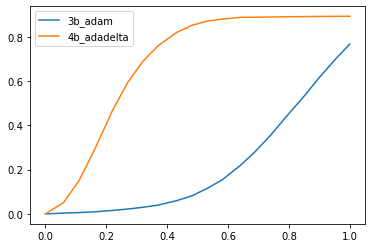

In [28]:
plt.plot(1-np.array(perc)/100, 1-bdrop0, label="3b_adam")
plt.plot(1-np.array(perc)/100, 1-bdrop1, label="4b_adadelta")
plt.legend()
plt.show()

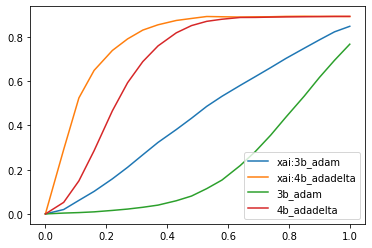

In [33]:
plt.title("MoRF curve")
plt.plot(1-np.array(perc)/100, 1-drop0, label="xai:3b_adam")
plt.plot(1-np.array(perc)/100, 1-drop1, label="xai:4b_adadelta")
plt.plot(1-np.array(perc)/100, 1-bdrop0, label="3b_adam")
plt.plot(1-np.array(perc)/100, 1-bdrop1, label="4b_adadelta")
plt.xlabel("% pix removed")
plt.ylabel("avg error")
plt.legend()
plt.savefig(r"C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\results\MoRF_curve_fidelity_3b4b.png")
plt.show()

In [38]:
np.mean(1-drop0)

0.4373033463348592

In [39]:
np.mean(1-drop1)

0.7678295304900484

In [40]:
np.mean(1-bdrop1)

0.6769576146917377

In [41]:
np.mean(1-bdrop0)

0.2219057289009787